## MATING STRATEGIES

### 01 load model

In [104]:
import sys
sys.path.append("../../../deepyeast/")
import os

import pandas as pd

from utils import load_model, load_image, plot_result
from postprocess.post_process_utils import post_process_panoptic
from analysis.multi_fluorescent_image_feature import FluorescentImage, FluorescentClassification

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
model = load_model("../../../model_dir/deepyeast_001/", "../../configs/config_wl.yaml")

DEEPLAB INIT
DEEPLAB INIT (33, 33)
Setting pooling size to %s (33, 33)
restoring or initializing model...
restored model from ../../../model_dir/deepyeast_001/ckpt-62000.
restored from checkpoint: ../../../model_dir/deepyeast_001/ckpt-62000


### 02 load image and prediction mask

In [106]:
image = load_image("../../../../data/Sj_MATECHOICE/20220524_yGL0154xyGL0360_VACfiltered_12_snapshot_R3D.dv_Composite.tif")

In [109]:
output = model.predict(image[0])

norm
Getting pooling size to %s (None, None)
Eval with scales %s ListWrapper([1.0]) (None, None)


In [110]:
mask = post_process_panoptic(output["panoptic_pred"][0].numpy(), area_threshold=1000)

### 03 counting

In [111]:
fimageobj = FluorescentImage(image, mask)

In [112]:
data = fimageobj.cell_classification(n_components=4, init_params='kmeans')

/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/threadpoolctl.py:546: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


### 04 save result

In [113]:
save_path = "./test/"
basename = "001"

all_tabel = pd.DataFrame(columns=['cell_gray','tetrad_gray','cell_green','terad_green','cell_red','tetrad_red'],)

In [114]:
data[['centroid_0','centroid_1','semantic']] = fimageobj.mask.instance_properties[['centroid_0','centroid_1','semantic']]

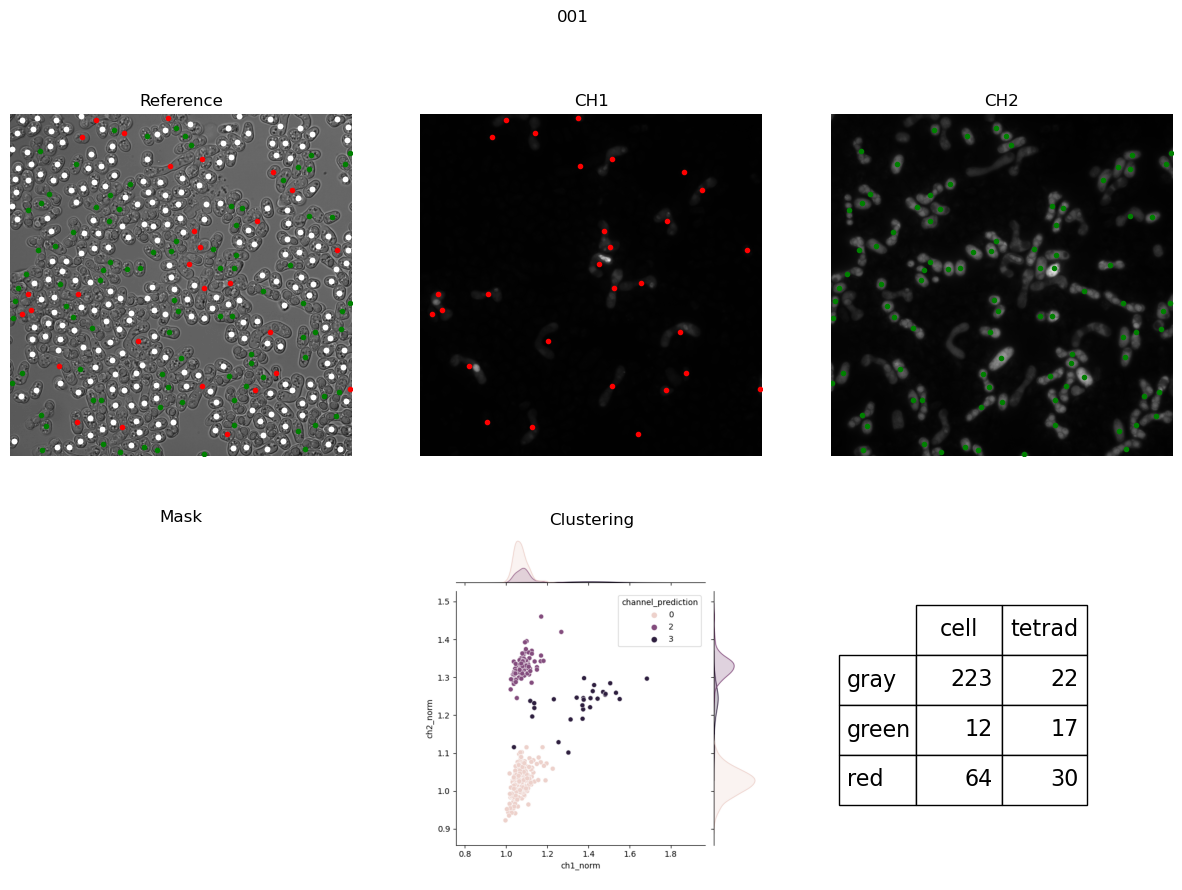

In [115]:
fig,tabel = plot_result(image, data, basename=basename)

In [116]:
all_tabel.loc[basename] =tabel.values.flatten()
all_tabel.to_csv(os.path.join(save_path, basename+".csv"))
fig.savefig(os.path.join(save_path, basename+'.png'))

## run with command line

In [2]:
import sys
sys.path.append("../../../deepyeast/")

In [3]:
from utils import batch_processing

2023-01-03 01:37:51.418065: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-03 01:37:54.351074: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-03 01:37:59.643742: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /dcsrsoft/spack/arolle/v1.0/spack/opt/spack/linux-rhel8-zen/gcc-8.4.1/gcc-10.4.0-7fjdev7tbifqfonsjwlqmr6qcnza2ezu/lib64:/dcsrsoft/spack/arolle/v1.0/spack/opt/spack/linux-rhel8-zen/gcc-8.4.1/gcc-10.4.0-7fjdev7tbif

DEEPLAB INIT
DEEPLAB INIT (33, 33)
Setting pooling size to %s (33, 33)
restoring or initializing model...
restored model from ../../../model_dir/deepyeast_001/ckpt-63000.
restored from checkpoint: ../../../model_dir/deepyeast_001/ckpt-63000


  0%|          | 0/6 [00:00<?, ?it/s]

norm
Getting pooling size to %s (None, None)
Eval with scales %s ListWrapper([1.0]) (None, None)


2023-01-03 01:38:16.577703: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2023-01-03 01:38:23.204137: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-03 01:38:23.645984: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/threadpoolctl.py:546: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
 17

norm
Getting pooling size to %s (None, None)
Eval with scales %s ListWrapper([1.0]) (None, None)


/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/threadpoolctl.py:546: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
 33%|███▎      | 2/6 [02:39<04:58, 74.56s/it] 

norm
Getting pooling size to %s (None, None)
Eval with scales %s ListWrapper([1.0]) (None, None)


/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/threadpoolctl.py:546: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
 50%|█████     | 3/6 [03:42<03:28, 69.46s/it]

norm
Getting pooling size to %s (None, None)
Eval with scales %s ListWrapper([1.0]) (None, None)


/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/threadpoolctl.py:546: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
 67%|██████▋   | 4/6 [04:08<01:44, 52.13s/it]

norm
Getting pooling size to %s (None, None)
Eval with scales %s ListWrapper([1.0]) (None, None)


/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/threadpoolctl.py:546: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
 83%|████████▎ | 5/6 [04:56<00:59, 59.33s/it]


ValueError: Shapes (145, 512, 512, 1) and (None, None, 1) are incompatible

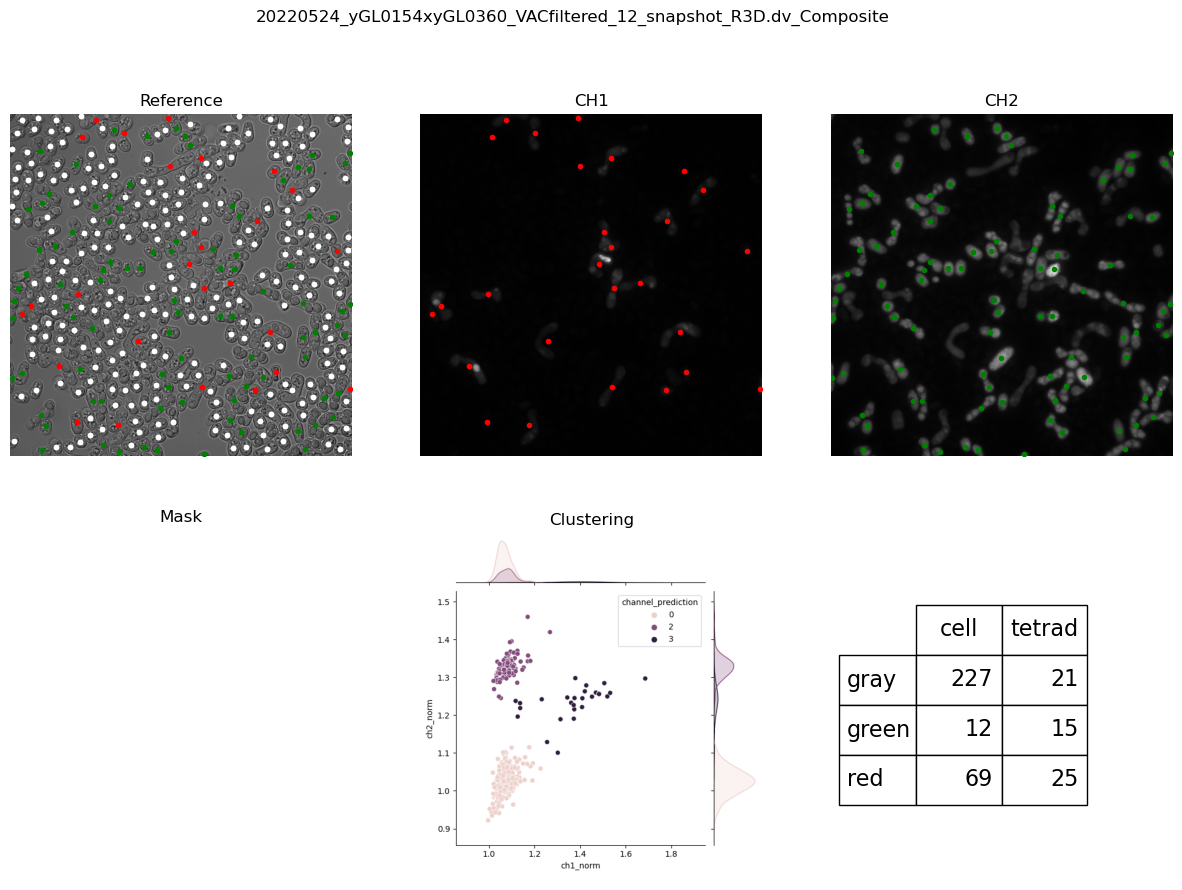

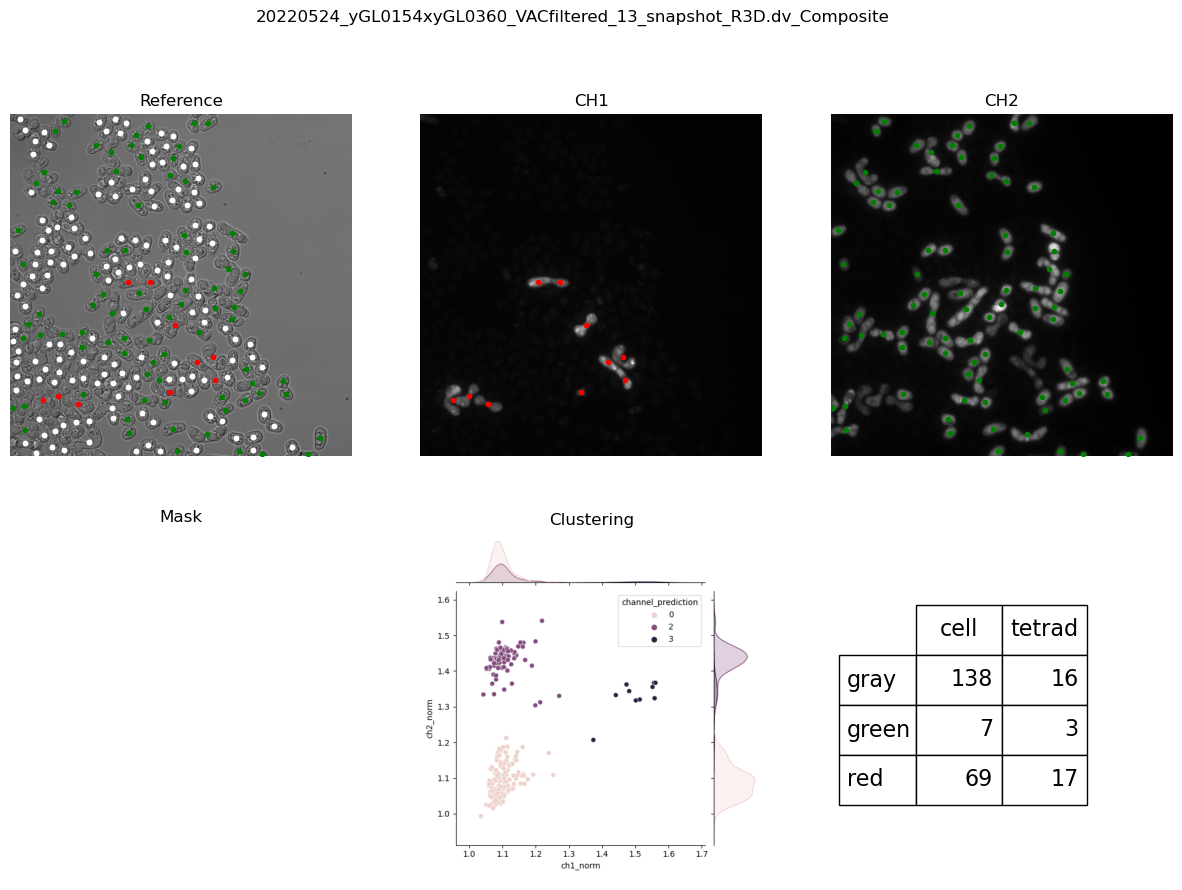

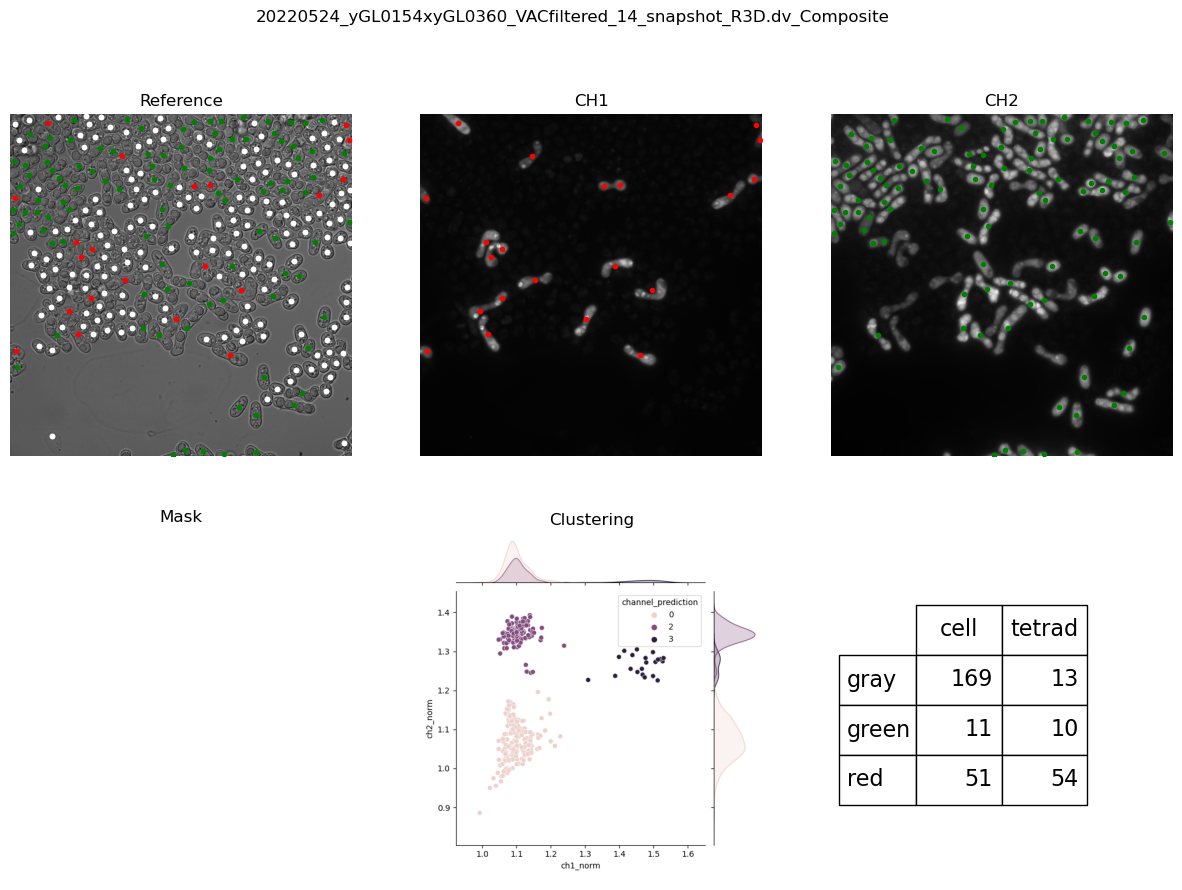

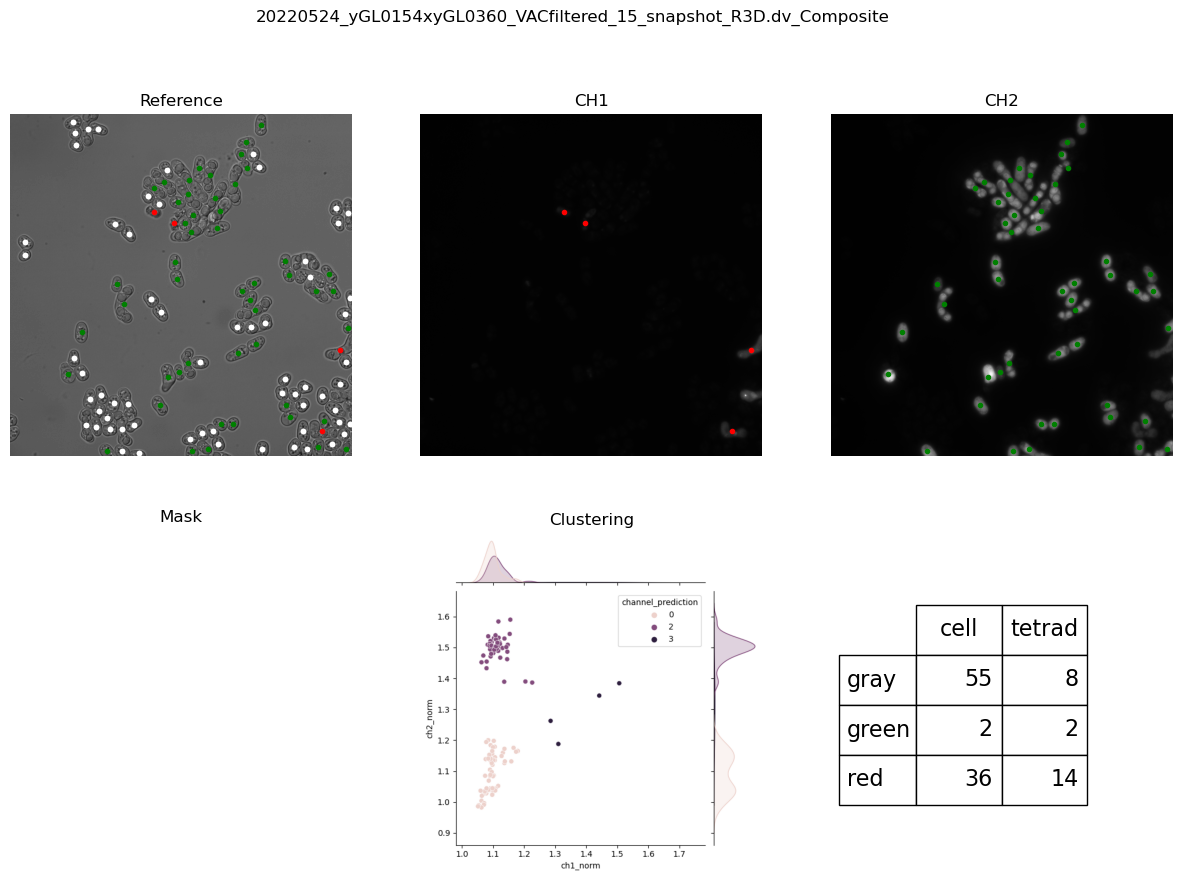

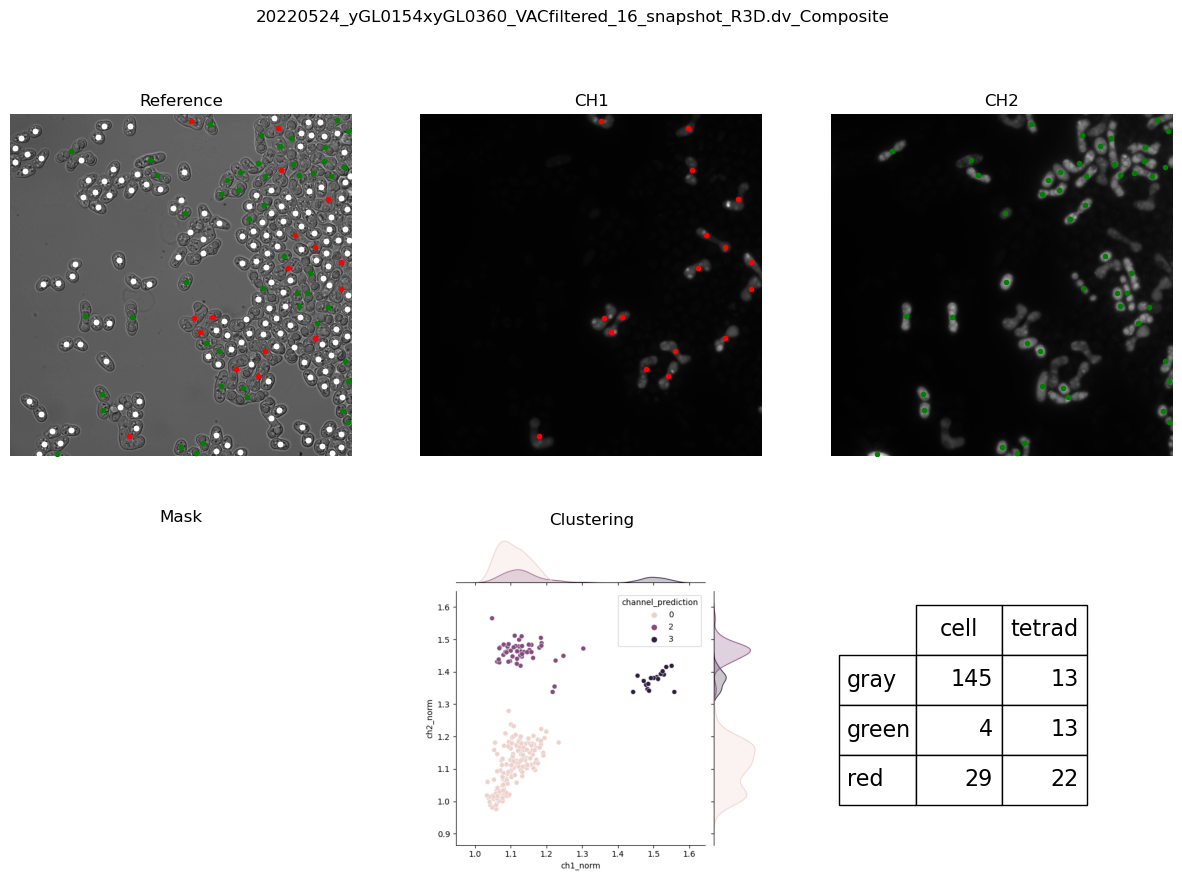

In [4]:
batch_processing("../../../../data/Sj_MATECHOICE/" ,"../../../model_dir/deepyeast_001/","../../configs/config_wl.yaml","./test/")

In [1]:
!python run_batch_processing.py --root_dir="../../../../data/Sj_MATECHOICE/" --model_dir="../../../model_dir/deepyeast_001/" --config_file="../../configs/config_wl.yaml" --save_path="./test/"

2023-01-03 01:35:18.788848: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-03 01:35:20.569125: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-03 01:35:25.101346: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /dcsrsoft/spack/arolle/v1.0/spack/opt/spack/linux-rhel8-zen/gcc-8.4.1/gcc-10.4.0-7fjdev7tbifqfonsjwlqmr6qcnza2ezu/lib64:/dcsrsoft/spack/arolle/v1.0/spack/opt/spack/linux-rhel8-zen/gcc-8.4.1/gcc-10.4.0-7fjdev7tbif